<a href="https://colab.research.google.com/github/anand755/Tensorflow/blob/master/Tensorflow_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt

ValueError: ignored

In [0]:
is_correct_tf_version = '1.13' in tf.__version__
assert is_correct_tf_version, "Wrong tensorflow version {} installed".format(tf.__version__)

is_eager_enabled = tf.executing_eagerly()
assert is_eager_enabled, "Tensorflow eager mode is not enabled"

In [4]:
a = tf.constant(15, name="a")
b = tf.constant(61, name="b")
c = tf.add(a,b , name="c")
print(c)

tf.Tensor(76, shape=(), dtype=int32)


In [14]:
def graph(a,b):
  c = tf.add(a,b, name="c")
  d = tf.subtract(b,1, name="d")
  e = tf.multiply(c,d, name="e")
  return e

a= 1.5
b= 2.5
e_out = graph(1.5, 2.5)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


In [0]:
def our_dense_layer(x, n_in, n_out):
  W = tf.Variable(tf.ones((n_in, n_out)))
  b = tf.Variable(tf.zeros((1, n_out)))
  z = tf.matmul(x,W) + b
  
  out = tf.sigmoid(z)
  return out

In [17]:
x_input = tf.constant([[1,2.]], shape=(1,2))
print(our_dense_layer(x_input, n_in = 2, n_out=3))

tf.Tensor([[0.95257413 0.95257413 0.95257413]], shape=(1, 3), dtype=float32)


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_input_nodes=2
n_output_nodes=3

model = Sequential()

dense_layer = Dense(n_output_nodes, input_shape=(n_input_nodes,), activation='sigmoid')

model.add(dense_layer)

In [26]:
x_input = tf.constant([[1,2.]], shape=(1,2))
print(model(x_input))

tf.Tensor([[0.3633738  0.09434186 0.8569561 ]], shape=(1, 3), dtype=float32)


**Automatic differentiation**

Initializing X=[[1.213882]]


Text(0, 0.5, 'X Value')

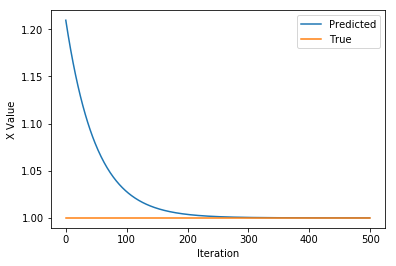

In [60]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing X={}".format(x.numpy()))

learning_rate = 1e-2
history=[]

for i in range(500):
  with tf.GradientTape() as tape:
    y = (x - 1)**2
    
    grad = tape.gradient(y,x)
    new_x = x- learning_rate*grad
    x.assign(new_x)
    history.append(x.numpy()[0])

plt.plot(history)
plt.plot([0,500],[1,1])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('X Value')


In [3]:
a = tf.constant(12)
counter = 0

while not tf.equal(a,1):
  if tf.equal(a%2, 0):
    a = a/2
  else:
    a = 3 ** a + 1
  print(a)

TypeError: ignored